<a href="https://colab.research.google.com/github/mvl16/skyline/blob/main/_1_Python_Notebook_Setup_by_VJ_Laredo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question #1: Is there an association between hours of people sleep at night and feeling depressed?

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1: 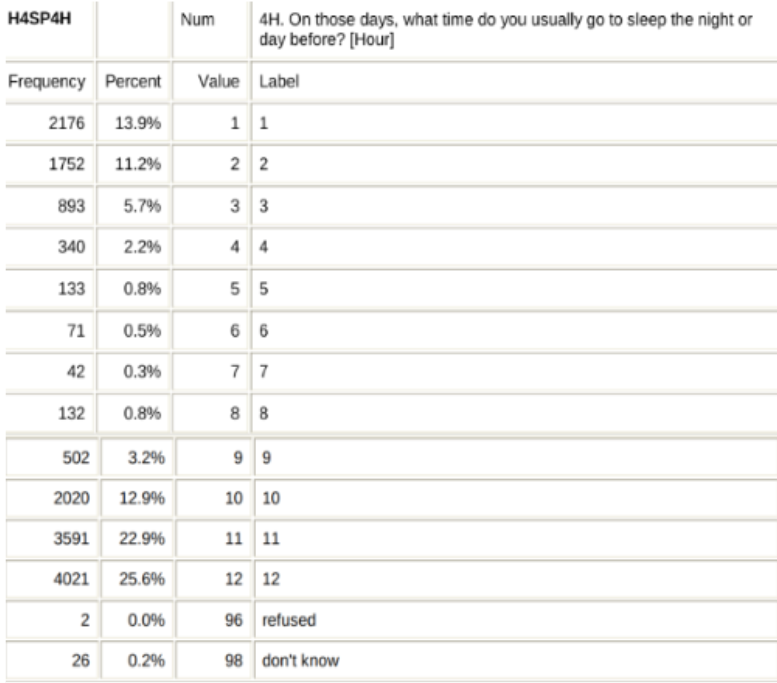

In [19]:
df['H4SP4H'].value_counts()

      1390
12    1311
11    1194
1      680
10     674
2      555
3      277
9      177
4      116
8       44
5       43
6       21
7       14
98       7
96       1
Name: H4SP4H, dtype: int64

In [20]:
df['hours_slept_night'] = df['H4GH13H']
df['hours_slept_night']= pd.to_numeric(df['hours_slept_night'],errors= 'coerce')
df['hours_slept_night']= df['hours_slept_night'].loc[df['hours_slept_night'] < 96]
df['hours_slept_night']= df['hours_slept_night'].loc[df['hours_slept_night'] != ' ']
df['hours_slept_night'].value_counts()

12.0    442
10.0    435
9.0     413
8.0     335
11.0    307
1.0     292
2.0     254
7.0     254
6.0     238
3.0     204
5.0     203
4.0     194
Name: hours_slept_night, dtype: int64

In [21]:
#Mintues

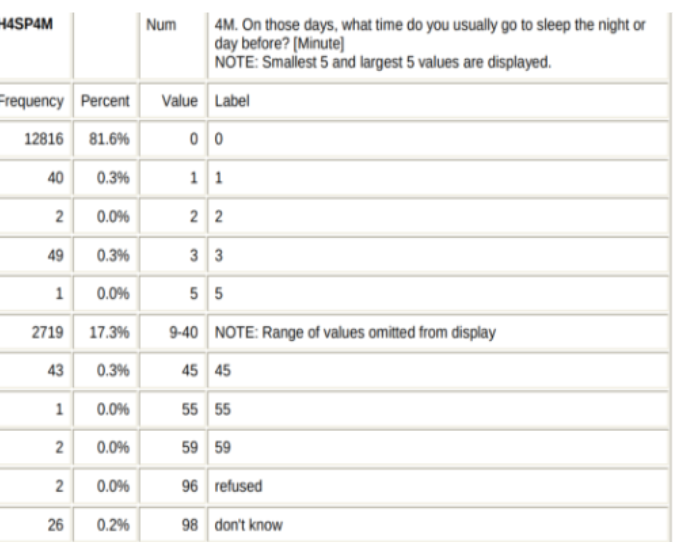

In [22]:
df['H4SP4M'].value_counts()

0     4178
      1390
30     869
3       17
1       16
45      12
98       7
15       7
20       3
9        1
10       1
96       1
2        1
5        1
Name: H4SP4M, dtype: int64

In [24]:
df['mins_sleep']= df['H4SP4M']
df['mins_sleep']= pd.to_numeric(df['mins_sleep'],errors= 'coerce')
df['mins_sleep']= df['mins_sleep'].loc[df['mins_sleep'] < 96]
df['mins_sleep']= df['mins_sleep'].loc[df['mins_sleep'] != ' ']
df['mins_sleep'].value_counts()

0.0     4178
30.0     869
3.0       17
1.0       16
45.0      12
15.0       7
20.0       3
9.0        1
10.0       1
2.0        1
5.0        1
Name: mins_sleep, dtype: int64

In [25]:
#AM/PM

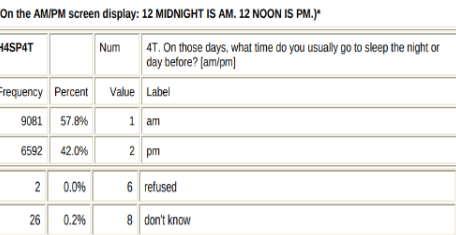

In [26]:
df['H4SP4T'].value_counts()

1    2942
2    2164
     1390
8       7
6       1
Name: H4SP4T, dtype: int64

In [27]:
df['am_pm_sleep']=df['H4SP4T']
df['am_pm_sleep'] = df['am_pm_sleep'].loc[df['am_pm_sleep'] !=' ']
df['am_pm_sleep'] = df['am_pm_sleep'].loc[df['am_pm_sleep'] <'6']
df['am_pm_sleep'].replace(['1','2'],['am','pm'],inplace=True)
df['am_pm_sleep'].value_counts()

am    2942
pm    2164
Name: am_pm_sleep, dtype: int64

In [28]:
#Step 3
df_time_convert= df[['am_pm_sleep','hours_slept_night','mins_sleep']]
#df_time_convert = df[['am_pm', 'hour', 'minutes']]

In [29]:
#Drops the missing values/cleans it 
df_time_convert.dropna(inplace=True)

<ipython-input-29-bd75b9aca4df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [30]:
df_time_convert

,am_pm_sleep,hours_slept_night,mins_sleep
1,am,9.0,0.0
7,pm,11.0,30.0
13,am,2.0,0.0
15,pm,5.0,30.0
17,am,2.0,0.0
...,...,...,...
6496,am,5.0,0.0
6498,am,12.0,30.0
6501,am,10.0,0.0
6502,am,8.0,1.0


In [31]:
#Step 4
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [32]:
to_military_time_float('9','30','AM')

9.5

In [33]:
#Step 5 
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hours_slept_night'],x['mins_sleep'],x['am_pm_sleep']),axis = 1)
#axis=1, to the column, apply the values 
df_time_convert

<ipython-input-33-bb50a73a2937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['hours_slept_night'],x['mins_sleep'],x['am_pm_sleep']),axis = 1)


,am_pm_sleep,hours_slept_night,mins_sleep,Time Value (float)
1,am,9.0,0.0,21.000000
7,pm,11.0,30.0,23.500000
13,am,2.0,0.0,14.000000
15,pm,5.0,30.0,17.500000
17,am,2.0,0.0,14.000000
...,...,...,...,...
6496,am,5.0,0.0,17.000000
6498,am,12.0,30.0,0.500000
6501,am,10.0,0.0,22.000000
6502,am,8.0,1.0,20.016667


In [34]:
df_time_convert.loc[df_time_convert['Time Value (float)'] > 24]

,am_pm_sleep,hours_slept_night,mins_sleep,Time Value (float)


In [35]:
df= df.assign(sleep_military_times= df_time_convert['Time Value (float)'])

In [36]:
df

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7,hours_slept_night,mins_sleep,am_pm_sleep,sleep_military_times
0,5710027,2,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,2,1,9.0,0.0,am,21.000000
2,5710317,1,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,4,1,NaN,0.0,am,NaN
4,5710455,2,,,,,,,,,...,,,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,9971993,2,14.26027397,6,7,2008,2288373,373,2,V5.4,...,0,0,0,0,4,2,NaN,0.0,am,NaN
6500,9971993,1,,2,13,2008,2288343,343,1,V5.1,...,0,0,0,0,3,2,NaN,0.0,am,NaN
6501,9971997,1,15.09315068,3,22,2008,2288325,325,1,V5.2,...,1,0,0,0,4,3,10.0,0.0,am,22.000000
6502,9971997,2,15.50958904,4,1,2008,2288325,325,2,V5.2,...,0,0,0,0,3,2,8.0,1.0,am,20.016667


In [37]:
df['hours_slept_night'].value_counts()

12.0    442
10.0    435
9.0     413
8.0     335
11.0    307
1.0     292
2.0     254
7.0     254
6.0     238
3.0     204
5.0     203
4.0     194
Name: hours_slept_night, dtype: int64

In [38]:
df['sleep_military_times'].value_counts()

0.000000     365
22.000000    358
21.000000    331
20.000000    271
23.000000    252
13.000000    246
19.000000    204
18.000000    198
14.000000    186
15.000000    179
16.000000    162
17.000000    157
21.500000     81
0.500000      74
22.500000     72
14.500000     63
20.500000     62
23.500000     52
19.500000     48
17.500000     42
13.500000     38
18.500000     34
16.500000     29
15.500000     23
18.050000      3
16.050000      3
13.016667      3
18.016667      2
14.750000      2
22.250000      2
22.750000      1
14.050000      1
13.050000      1
0.250000       1
17.083333      1
21.750000      1
13.033333      1
19.750000      1
18.250000      1
19.050000      1
17.016667      1
13.333333      1
22.016667      1
23.750000      1
20.050000      1
15.016667      1
0.750000       1
22.050000      1
14.016667      1
17.150000      1
0.050000       1
23.050000      1
23.016667      1
20.016667      1
Name: sleep_military_times, dtype: int64

In [39]:
df['sleep_military_times'].max()

23.75

In [40]:
df['sleep_military_times'].min()

0.0

In [41]:
df['sleep_military_times'].median()

18.016666666666666

In [42]:
df['sleep_military_times'].mode()

0    0.0
Name: sleep_military_times, dtype: float64

In [43]:
df['sleep_military_times'].mean()

16.356052533183775

In [44]:
rp.summary_cont(df['sleep_military_times'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sleep_military_times,3566.0,16.3561,6.8395,0.1145,16.1315,16.5806


In [45]:
df['sleep_military_times'].describe()

count    3566.000000
mean       16.356053
std         6.839523
min         0.000000
25%        14.000000
50%        18.016667
75%        21.000000
max        23.750000
Name: sleep_military_times, dtype: float64

<Axes: xlabel='sleep_military_times', ylabel='Count'>

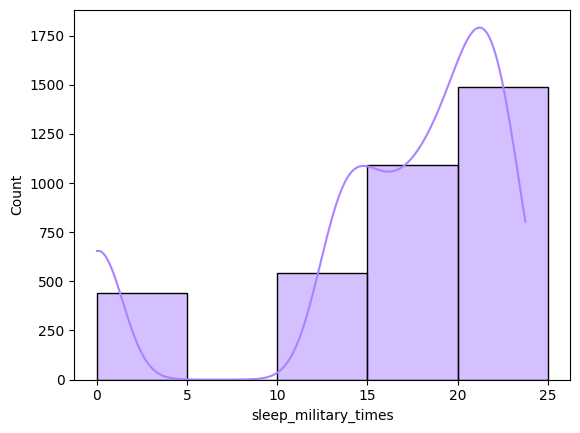

In [46]:
#Create a histogram with normal curve [kde =True]
sns.histplot(x = 'sleep_military_times', data =df, binwidth=5, kde = True, color = '#AB82FF')

<Axes: xlabel='sleep_military_times', ylabel='Count'>

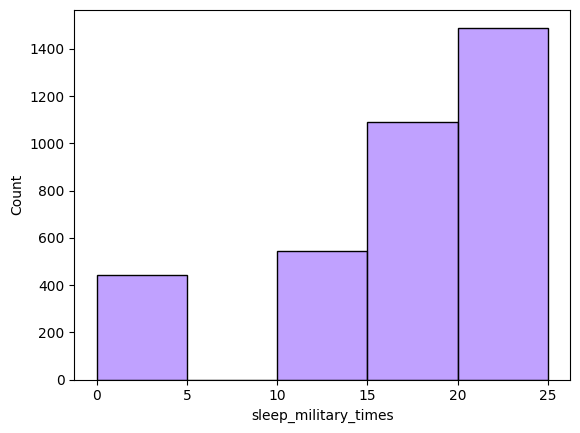

In [47]:
#Change the binwidth
sns.histplot(x = 'sleep_military_times', data =df, binwidth=5, color = '#AB82FF')

<Axes: xlabel='sleep_military_times', ylabel='Percent'>

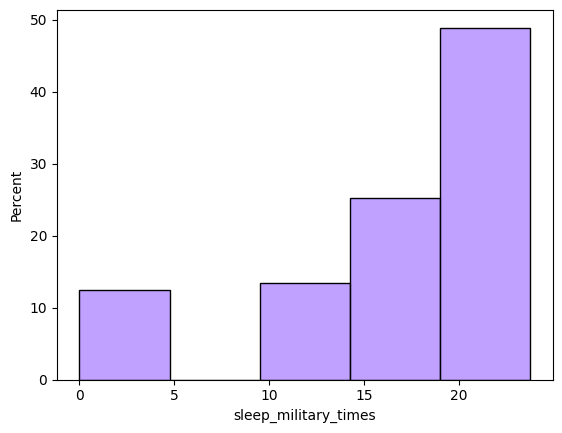

In [48]:
#Percent
sns.histplot(x = 'sleep_military_times', data =df, stat='percent', bins = 5, color = '#AB82FF')

<Axes: xlabel='sleep_military_times'>

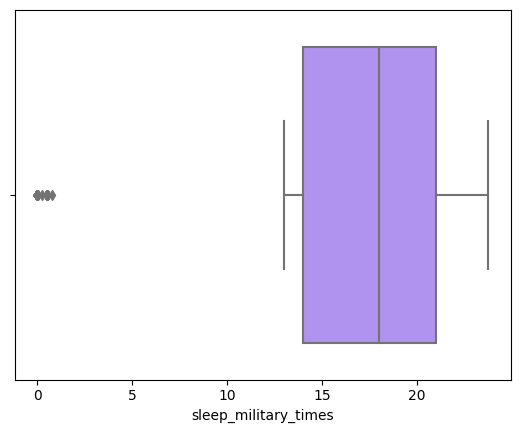

In [50]:
#Boxplots
sns.boxplot(x = 'sleep_military_times', data =df, color = '#AB82FF')

Codebook 2: 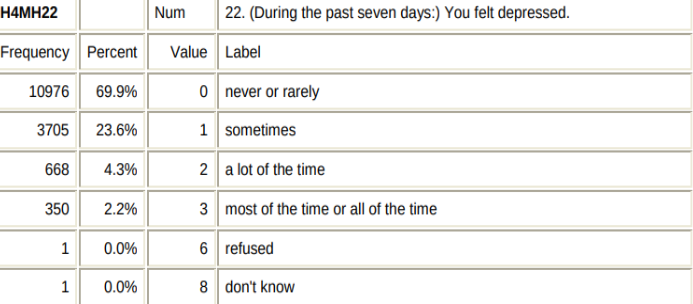

In [56]:
#frequency table for H4MH22
df['H4MH22'].value_counts ()

0    3616
     1390
1    1178
2     211
3     108
6       1
Name: H4MH22, dtype: int64

In [57]:
#Create new variable 'felt_depressed'
df['felt_depressed'] = df['H4MH22']
df['felt_depressed']. value_counts()

0    3616
     1390
1    1178
2     211
3     108
6       1
Name: felt_depressed, dtype: int64

In [61]:
#Remove missing values
df['felt_depressed'] = df['felt_depressed'].loc [ df ['felt_depressed'] !=' ']
df['felt_depressed'].value_counts()

never or rarely                         3616
sometimes                               1178
a lot of the time                        211
 most of the time or all of the time     108
Name: felt_depressed, dtype: int64

In [59]:
#Remove response of refused and I don't know (6 and 8)
df['felt_depressed'] = df['felt_depressed'].loc [ df ['felt_depressed'] !='6']
df['felt_depressed'] = df['felt_depressed'].loc [ df ['felt_depressed'] !='8']
df['felt_depressed'].value_counts()

0    3616
1    1178
2     211
3     108
Name: felt_depressed, dtype: int64

In [60]:
#Format names from numbers
df['felt_depressed'].replace(['0','1', '2','3'], ['never or rarely','sometimes', 'a lot of the time',' most of the time or all of the time'] , inplace= True)
df['felt_depressed'].value_counts()

never or rarely                         3616
sometimes                               1178
a lot of the time                        211
 most of the time or all of the time     108
Name: felt_depressed, dtype: int64

In [65]:
pip install researchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
#import researchPy
import researchpy as rp

In [68]:
#Create a Frequency table using ResearchPy
rp.summary_cat(df['felt_depressed'])

,Variable,Outcome,Count,Percent
0,felt_depressed,never or rarely,3616,70.72
1,,sometimes,1178,23.04
2,,a lot of the time,211,4.13
3,,most of the time or all of the time,108,2.11


In [ ]:
#Starting angle at 90 degrees, add labels, add titles
df['felt_depressed'].value_counts().plot(kind ='pie',startangle = 360, autopct='%1.1f%%', colors=['#CA2E55','#E4B363','#1B998B','#F87575','#F6F8FF'])
plt.title("(During the past seven days) You felt depressed")

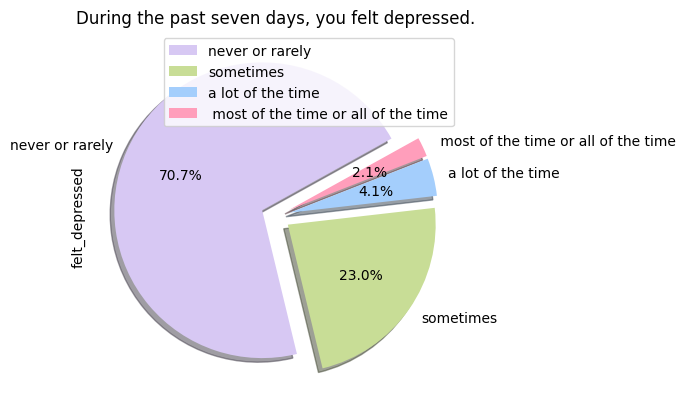

In [82]:
#Exploded pie chart
plt.title("During the past seven days, you felt depressed.")
explode = (0.1, 0.1, 0.1, 0.1)
df['felt_depressed'].value_counts().plot(kind ='pie', autopct='%1.1f%%', explode=explode, shadow=True, startangle= 389, colors=['#D7C8F3','#C8DD96','#A4CEFC','#FF9EBB'])
plt.legend(loc ="upper right")

<Axes: title={'center': 'During the past seven days, you felt depressed.'}, ylabel='Percent'>

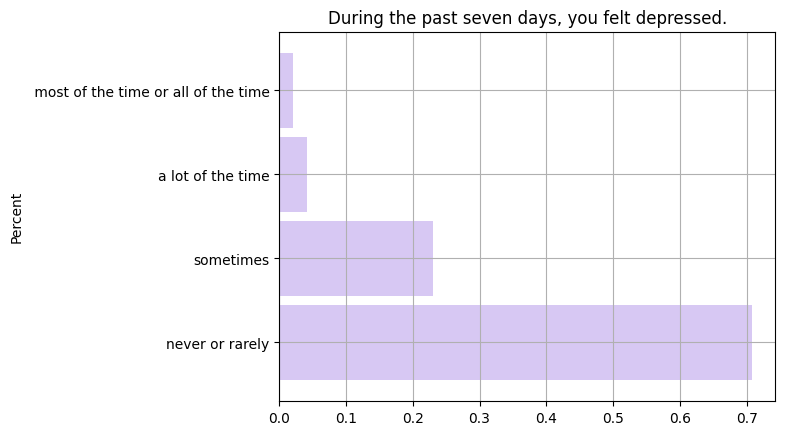

In [102]:
#Basic Bar Chart with color, width, title, axis labels
plt.xlabel("Amount of Time")
plt.ylabel("Percent")
plt.title("During the past seven days, you felt depressed.")
df['felt_depressed'].value_counts(normalize = True).plot(kind ='barh',color = '#D7C8F3', width = 0.9, grid = True)